<a href="https://colab.research.google.com/github/AidanNG/Stock-Market-Predictor/blob/main/predictor_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to get data from the s&p 500 to use for our predictor

In [ ]:
import yfinance as yf

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500  = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,0.0,0.0
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,0.0,0.0
2024-04-11 00:00:00-04:00,5172.950195,5211.779785,5138.770020,5199.060059,3509380000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-04-02 00:00:00-04:00', '2024-04-03 00:00:00-04:00',
               '2024-04-04 00:00:00-04:00', '2024-04-05 00:00:00-04:00',
               '2024-04-08 00:00:00-04:00', '2024-04-09 00:00:00-04:00',
               '2024-04-10 00:00:00-04:00', '2024-04-11 00:00:00-04:00',
               '2024-04-12 00:00:00-04:00', '2024-04-15 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24187, freq=None)

Now that we have some data, we want to clean and better visualize this data.

We take the date and closing price and plot it. (date as x and price as y)

<Axes: xlabel='Date'>

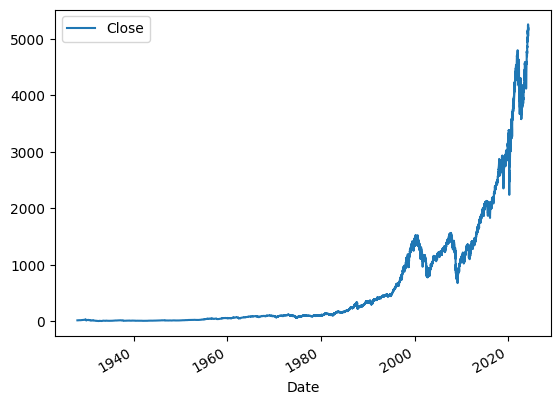

In [6]:
sp500.plot.line(y="Close", use_index=True)

We can remove a couple of columns, namingly the Dividends and Stock Splits columns. Bc these are for individual stocks, not an index.

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

We can now set up our target for our ML solution.(price up or price down). On days when the price goes up, can we accurately test to see if it will and if we should buy or not.

In [10]:
#Tomorrow's price, we shift it back a day so that the closing price of the next day is its own column
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [11]:
#Since we don't know what tomorrow's price is, we can see that it is a NaN
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,5160.640137
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,5199.060059
2024-04-11 00:00:00-04:00,5172.950195,5211.779785,5138.770020,5199.060059,3509380000,5123.410156


In [12]:
#Target is a boolean to see if tomorrow's price is greater than today's price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [14]:
#new column with a 1 if the price went up or a 0 if the price went down
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,5160.640137,0
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,5199.060059,1
2024-04-11 00:00:00-04:00,5172.950195,5211.779785,5138.770020,5199.060059,3509380000,5123.410156,0


In [15]:
#We will want more relevant dates for our prediction so we will remove all data from before 1990
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,5160.640137,0
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,5199.060059,1
2024-04-11 00:00:00-04:00,5172.950195,5211.779785,5138.770020,5199.060059,3509380000,5123.410156,0


We can now start training our first model(RandomForestCalssifier)

In [19]:
#we choose this one because it works better with non-linear relationships
from sklearn.ensemble import RandomForestClassifier
#might try to raise n_estimators
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
#make train and test sets, make sure to remove knowledge of future
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
#all columns used to predict
predictors = ["Close","Volume","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
#measure if your model is doing what you think it is(accuracy metric)

from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [21]:
#it is a numpy array so we turn it into a pandas series
import pandas as pd
pred = pd.Series(preds, index=test.index)

In [24]:
#not the best score, we can improve this model below
precision_score(test["Target"], preds)

0.5833333333333334

<Axes: xlabel='Date'>

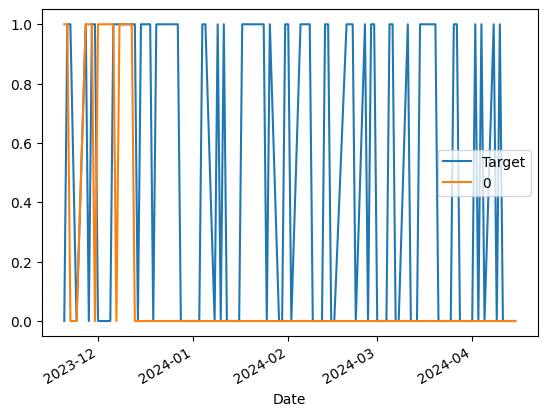

In [26]:
combined = pd.concat([test["Target"], pred], axis = 1)
combined.plot()

Time to build a more robust way to test our algorithm

In [33]:
#start back testing, combine all previous steps into a single function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [34]:
#training the model on the last 10 years of and then predicton on a step of a year (250 is a year)
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [35]:
predictions = backtest(sp500, model, predictors)

In [36]:
predictions["Predictions"].value_counts()

Predictions
0    3415
1    2722
Name: count, dtype: int64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.529757531227039

In [39]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534463
0    0.465537
Name: count, dtype: float64

We can see that the model isnt very good, or model did worse than the naturla percentage of days where the stock market just went up

We need to add more predictors

In [43]:
# rolling averages (2 days, trading week, month, years, and 4 years)
horizons = [2,5,60,250,1000]
new_predictors = []

for h in horizons:
    rolling_averages = sp500.rolling(h).mean()

    ratio_column  = f"Close_Ratio_{h}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{h}"
    sp500[trend_column] = sp500.shift(1).rolling(h).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

# we want to drop the rows with a NaN
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08 00:00:00-04:00,5211.370117,5219.569824,5197.350098,5202.390137,3278180000,5209.910156,1,0.999813,1.0,1.001568,2.0,1.031460,33.0,1.142721,137.0,1.266581,532.0
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,5160.640137,0,1.000722,1.0,1.002857,3.0,1.031486,34.0,1.143267,138.0,1.267691,532.0
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,5199.060059,1,0.995249,1.0,0.995321,2.0,1.020463,33.0,1.131393,138.0,1.254989,532.0


In [44]:
#improve the model parameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [45]:
#start back testing, combine all previous steps into a single function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    #return probability on the predict, reduces the number of trades
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [46]:
predictions  = backtest(sp500, model, new_predictors)

In [48]:
#we can see with this the value counts of 1s are much lower = buying stocks on lower number of days
predictions["Predictions"].value_counts()

Predictions
0.0    4304
1.0     832
Name: count, dtype: int64

In [49]:
#new precision score, much improvement from previous
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077

Even further improvements:
-exchanges over night
-could look at hourly data or better data

In [50]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-04-08 00:00:00-04:00,1,0.0
2024-04-09 00:00:00-04:00,0,0.0
2024-04-10 00:00:00-04:00,1,0.0
